In [13]:
import numpy as np
import pandas as pd
from pandas import Series
import statsmodels.api as sm
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

#from statsmodels.graphics.tsaplots import plot_acf

In [7]:
df = pd.read_csv('./serie_deflacionada_igpm.csv')

In [8]:
gas = df[df.PRODUTO == 'GASOLINA']
diesel = df[df.PRODUTO == 'OLEO_DIESEL']
etanol = df[df.PRODUTO == 'ETANOL_HIDRATADO']
gnv = df[df.PRODUTO == 'GNV']

In [9]:
data = [
    go.Scatter(
        x=gas['MES'], # assign x as the dataframe column 'x'
        y=gas['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Gasolina'
    ),
    go.Scatter(
        x=diesel['MES'], # assign x as the dataframe column 'x'
        y=diesel['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Diesel'
    ),
    go.Scatter(
        x=etanol['MES'], # assign x as the dataframe column 'x'
        y=etanol['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='Etanol'
    ),
    go.Scatter(
        x=gnv['MES'], # assign x as the dataframe column 'x'
        y=gnv['PRECO_MEDIO_REVENDA_DEFLACIONADO'],
        name='GNV'
    )
]

In [10]:
layout = go.Layout(
    title='Preço Médio Nacional de Revenda de Combustíveis',
    yaxis=dict(title='Preço (R$)'),
    xaxis=dict(title='Tempo')
)

In [11]:
fig = go.Figure(data=data, layout=layout)

In [12]:
py.iplot(fig, filename='line-plot-title')

In [18]:
gaso = gas.PRECO_MEDIO_REVENDA_DEFLACIONADO
etano = etanol.PRECO_MEDIO_REVENDA_DEFLACIONADO
ss = sm.tsa.stattools.acf(etano, nlags=200)
ssnp = np.array(ss)

trace = go.Scatter(
        x = np.linspace(0, 1, ssnp.size),
        y = ssnp
    )


data = [trace]

py.iplot(data, filename='basic-line')

In [23]:
diesilo = diesel.PRECO_MEDIO_REVENDA_DEFLACIONADO
series = Series.from_array(gaso)
series2 = Series.from_array(diesilo)
serie_etanol = Series.from_array(etano)

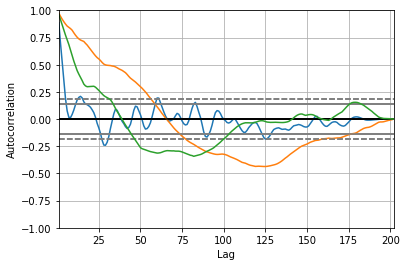

In [27]:
pd.plotting.autocorrelation_plot(serie_etanol);
pd.plotting.autocorrelation_plot(gaso);
pd.plotting.autocorrelation_plot(diesilo);